In [1]:
from maelzel.core import *
from pitchtools import *
from maelzel.snd.audiosample import Sample
import numpy as np
import os

In [2]:
cfg = getWorkspace().config
cfg['show.labelStyle'] = 'fontsize=7; placement=above; box=rectangle; family=sans'

Clip(source=/home/em/dev/python/maelzel/notebooks/snd/colours-german-male.flac, numChannels=1, sr=44100, dur=10.743, sourcedur=10.743s)
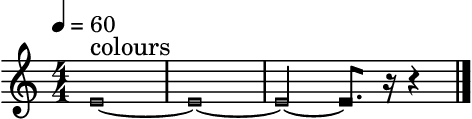

In [6]:
cl = Clip(os.path.abspath("../snd/colours-german-male.flac"), pitch="4E", label='colours')
cl

Sample(dur=10.74281179138322, sr=44100, ch=1)
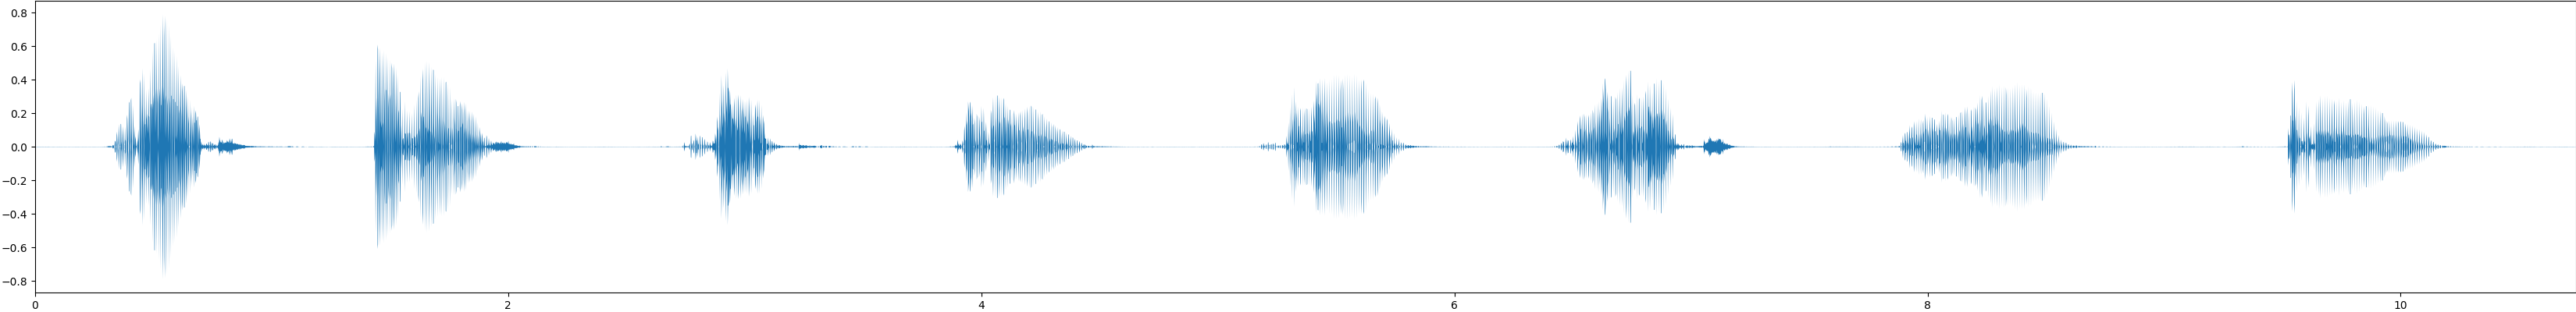

In [9]:
cl.asSample()

In [7]:
cfg = CoreConfig(active=True)
cfg['show.respellPitches'] = False
cfg['show.cents'] = False
cfg['chordAdjustGain'] = False
cfg['show.voiceMaxStaves'] = 3

In [8]:
dt = 1/16
times = np.arange(0, cl.durSecs(), dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=12, ampfactor=10, maxfreq=m2f(200), minfreq=40) or Rest(dt) for t in times]
chain = Chain(chords)

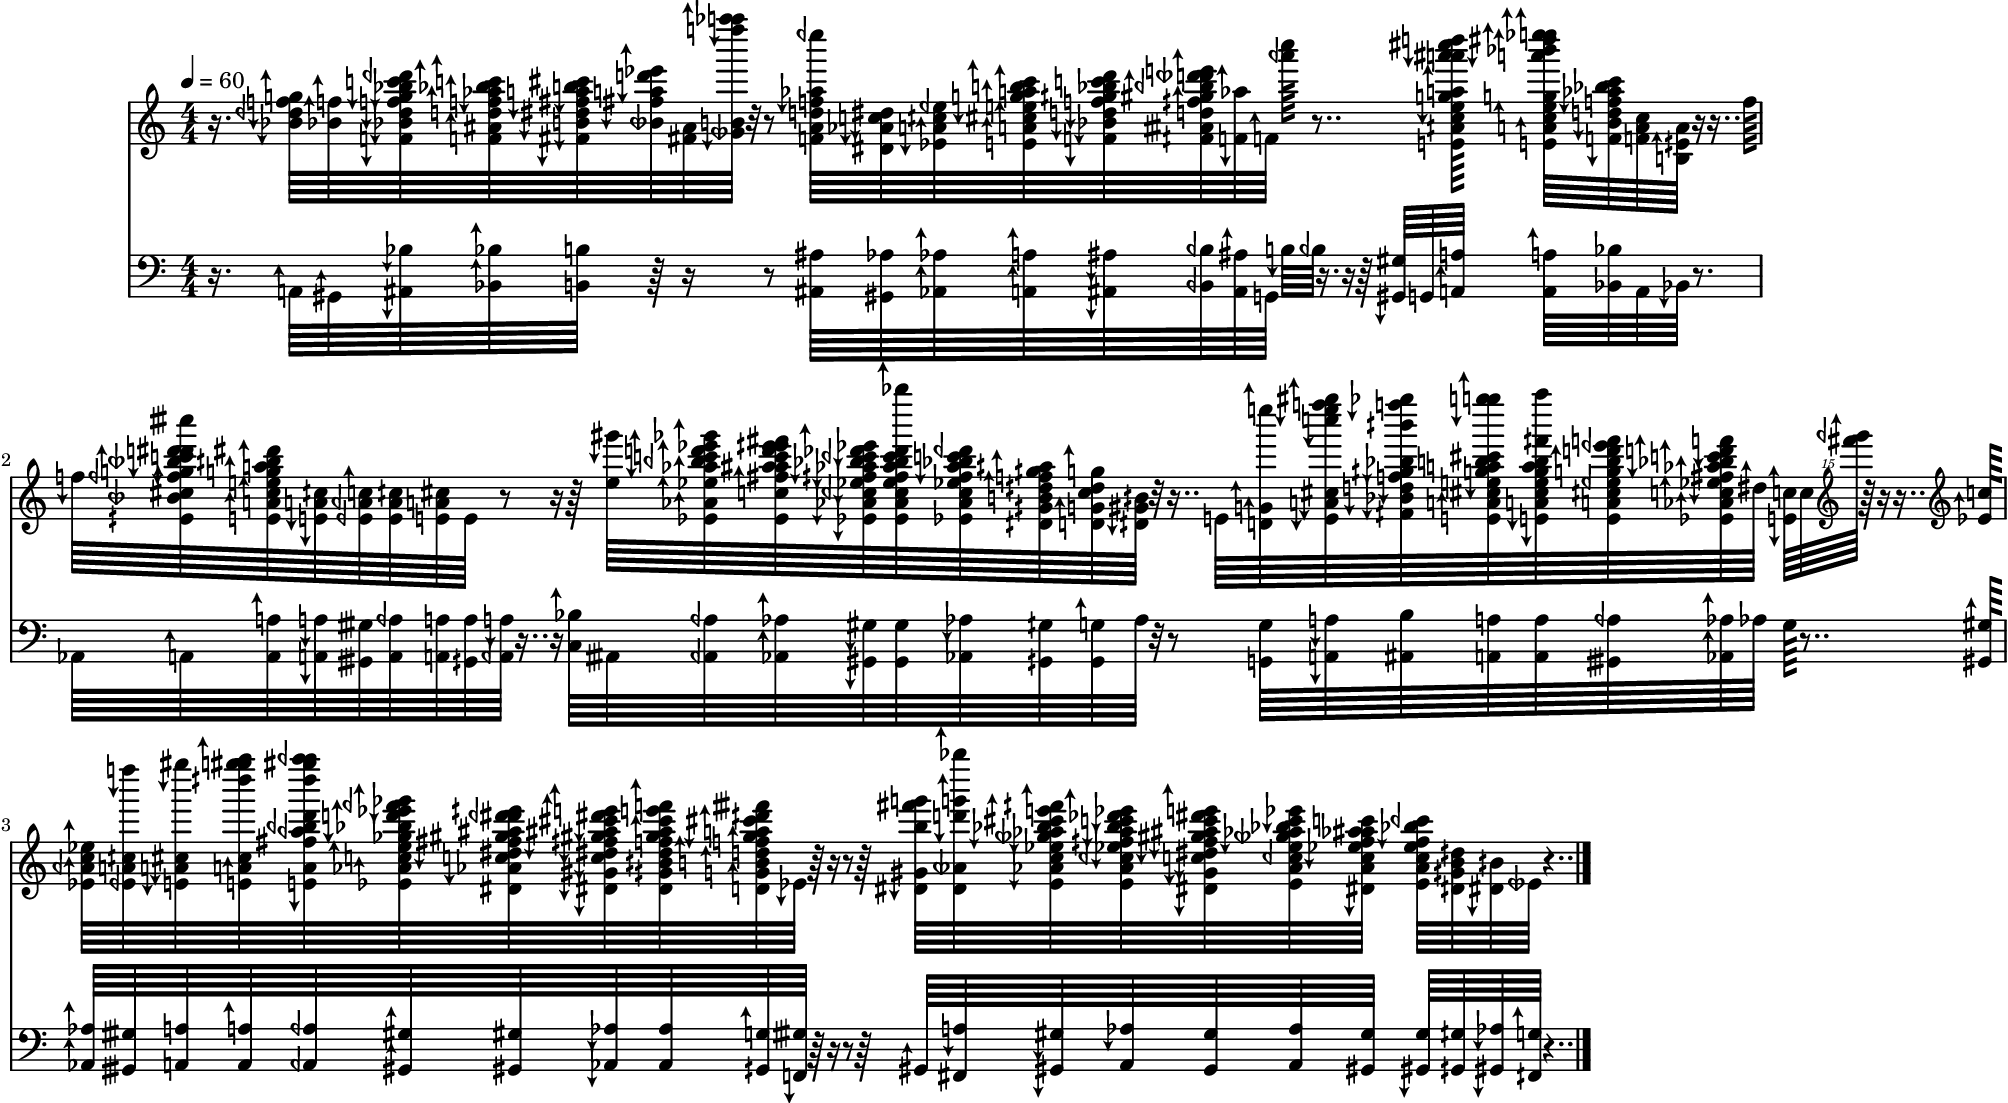

In [13]:
chain.show()

OfflineRenderer(sr=44100)
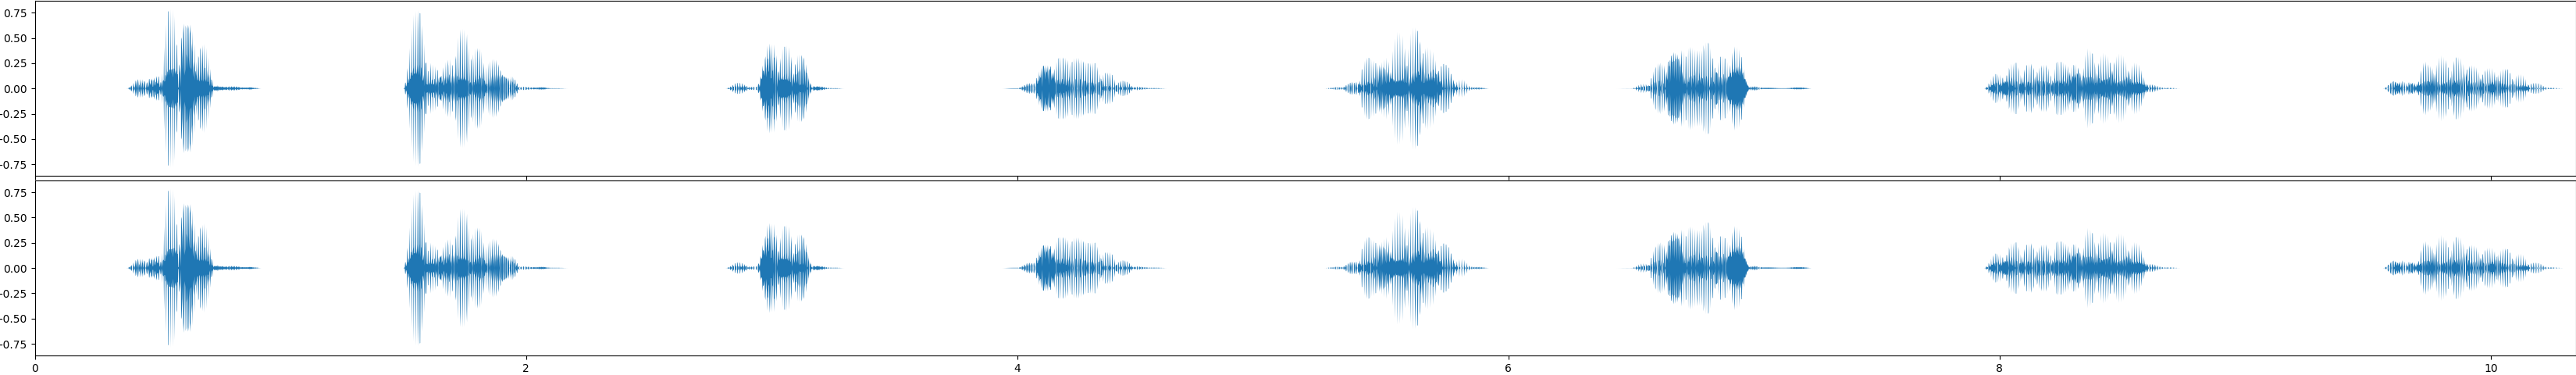

OfflineRenderer(sr=44100)
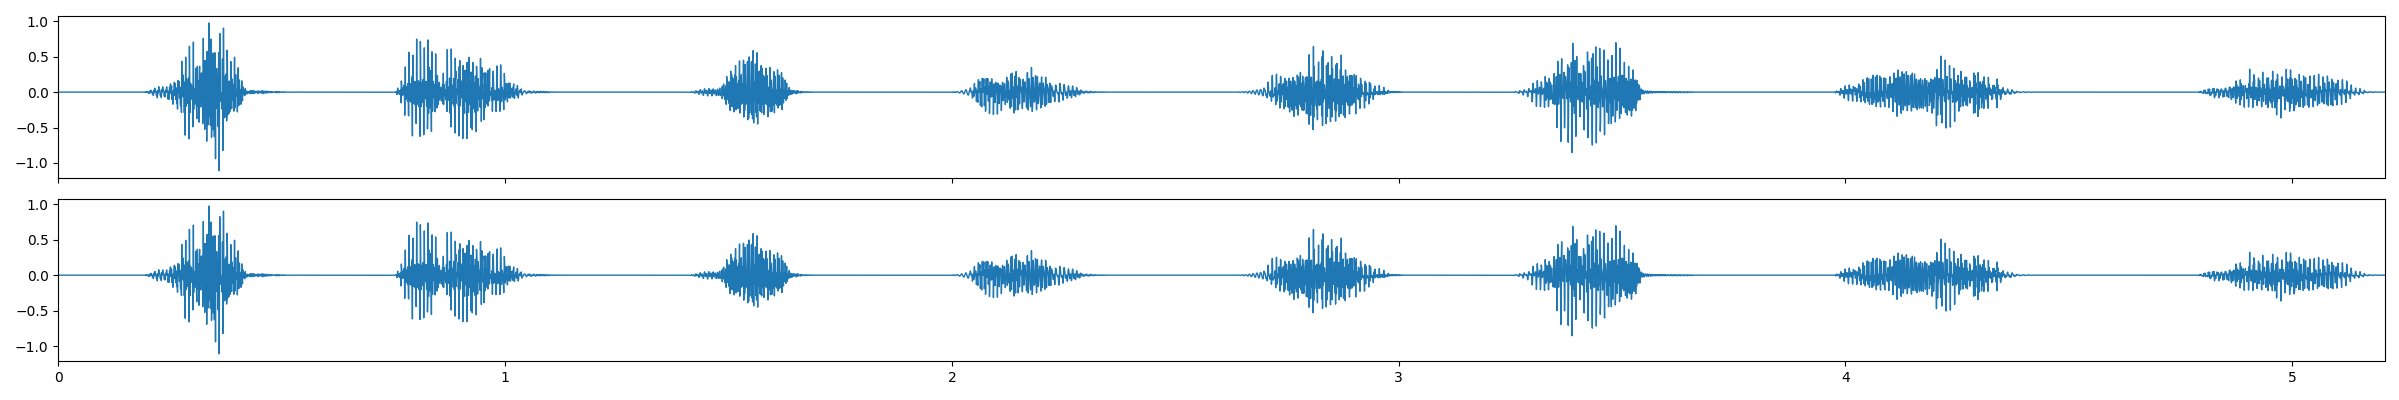

OfflineRenderer(sr=44100)
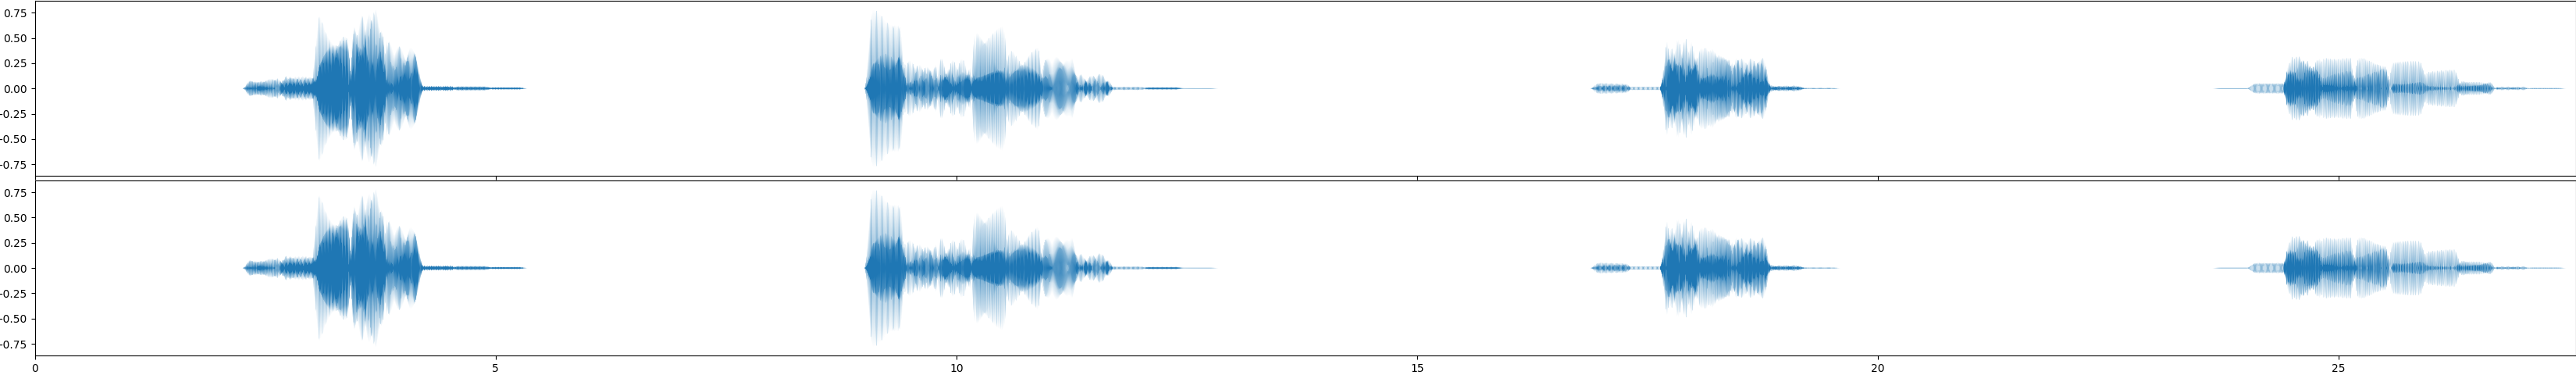

In [11]:

from IPython.display import display
with ScoreStruct(tempo=60):
    display(chain.rec(gain=0.2, instr='sin', fade=(0.05, 0.05), sustain=0.05))

with ScoreStruct(tempo=120):
    display(chain.rec(gain=0.2, instr='sin', fade=(0.05, 0.05), sustain=0.05))

with ScoreStruct(tempo=10) as struct:
    display(chain.rec(gain=0.2, instr='sin', fade=(0.1, 0.1), sustain=0.1, end=struct.beat(30)))

    

OfflineRenderer(sr=44100)
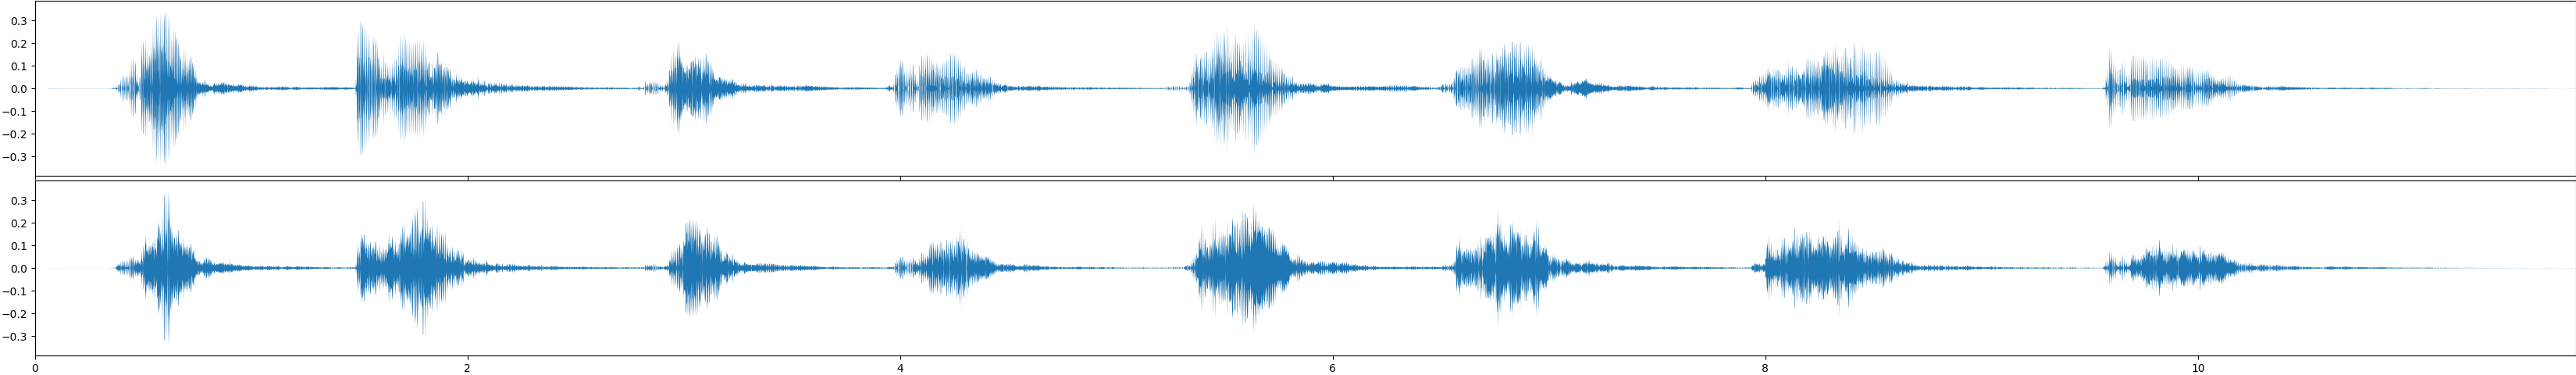

In [22]:
with render(endtime=chain.durSecs() + 1) as r:
    chain.play(gain=1.2, instr='.piano', fade=(0., 0.15), sustain=0.15, position=0.75, kwet=0.9)
    cl.play(position=0.25, gain=0.5, delay=0.05)
r

Chain([R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, ‹2A 4Bb 5Db 5F 5G 0.0625♩›, ‹2Ab 4Bb 5F 0.0625♩›, ‹2Bb 3Bb 4F 4Bb 5D 5F 5G 5Bb 6C 6D 0.0625♩›, ‹2Bb 3Bb 4F 4Bb 5D 5F 5Ab 5Bb 6C 0.0625♩›, …])
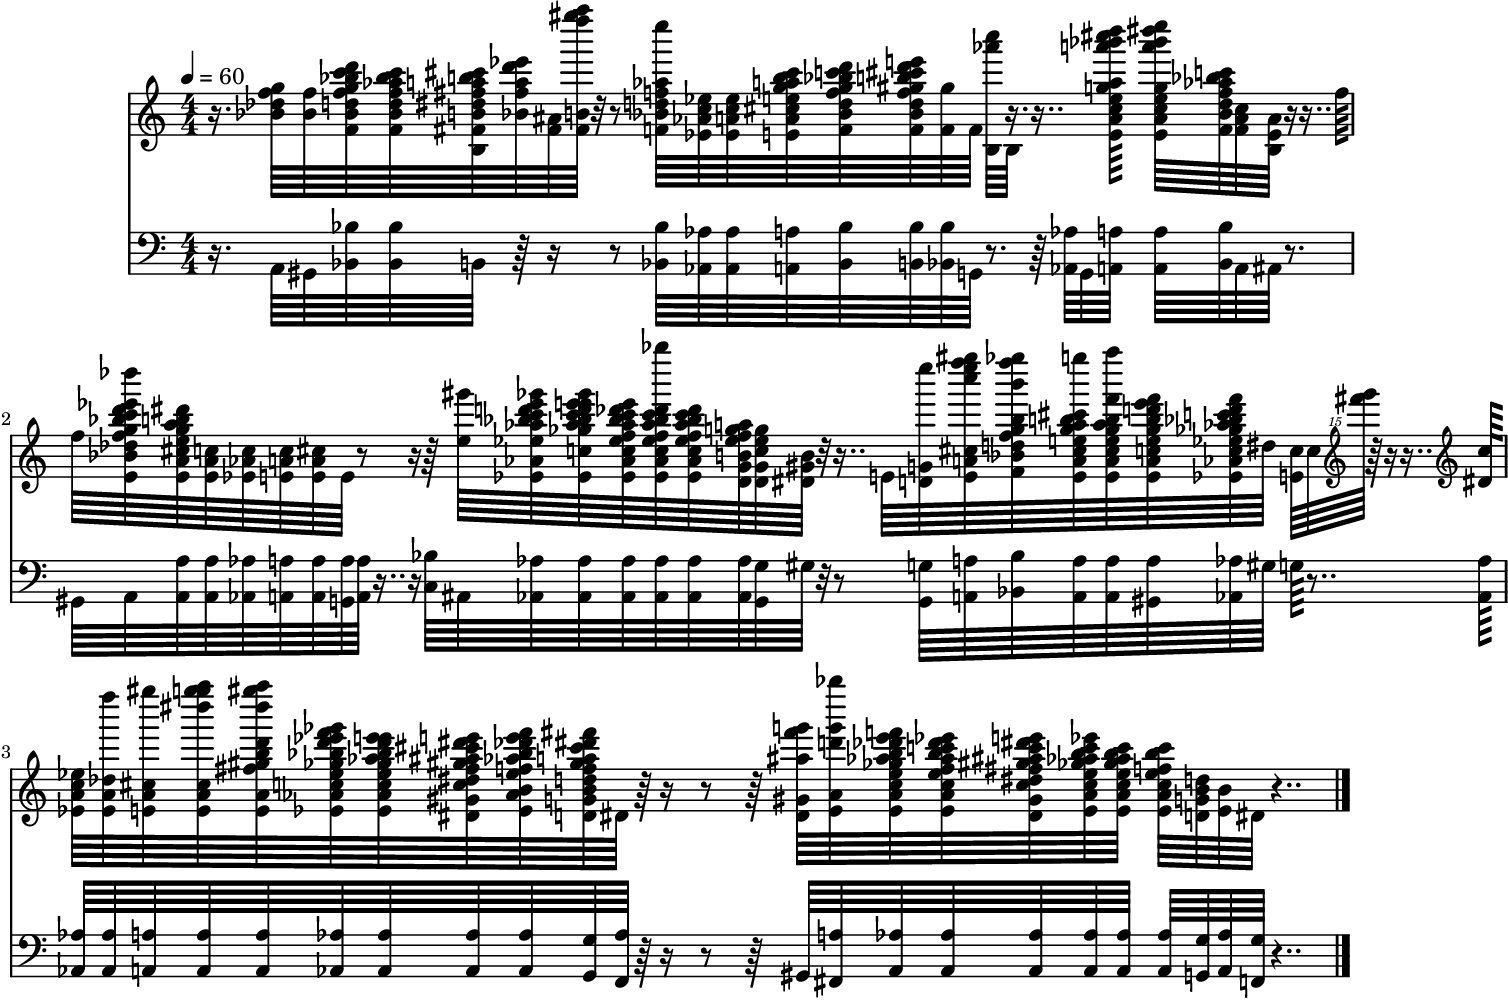

In [23]:
chain2 = chain.quantizePitch(step=1)
chain2

In [27]:
# Play with a bit of pedal

chain2.play(gain=0.2, instr='sin', fade=(0.01, 0.3), sustain=0.1)

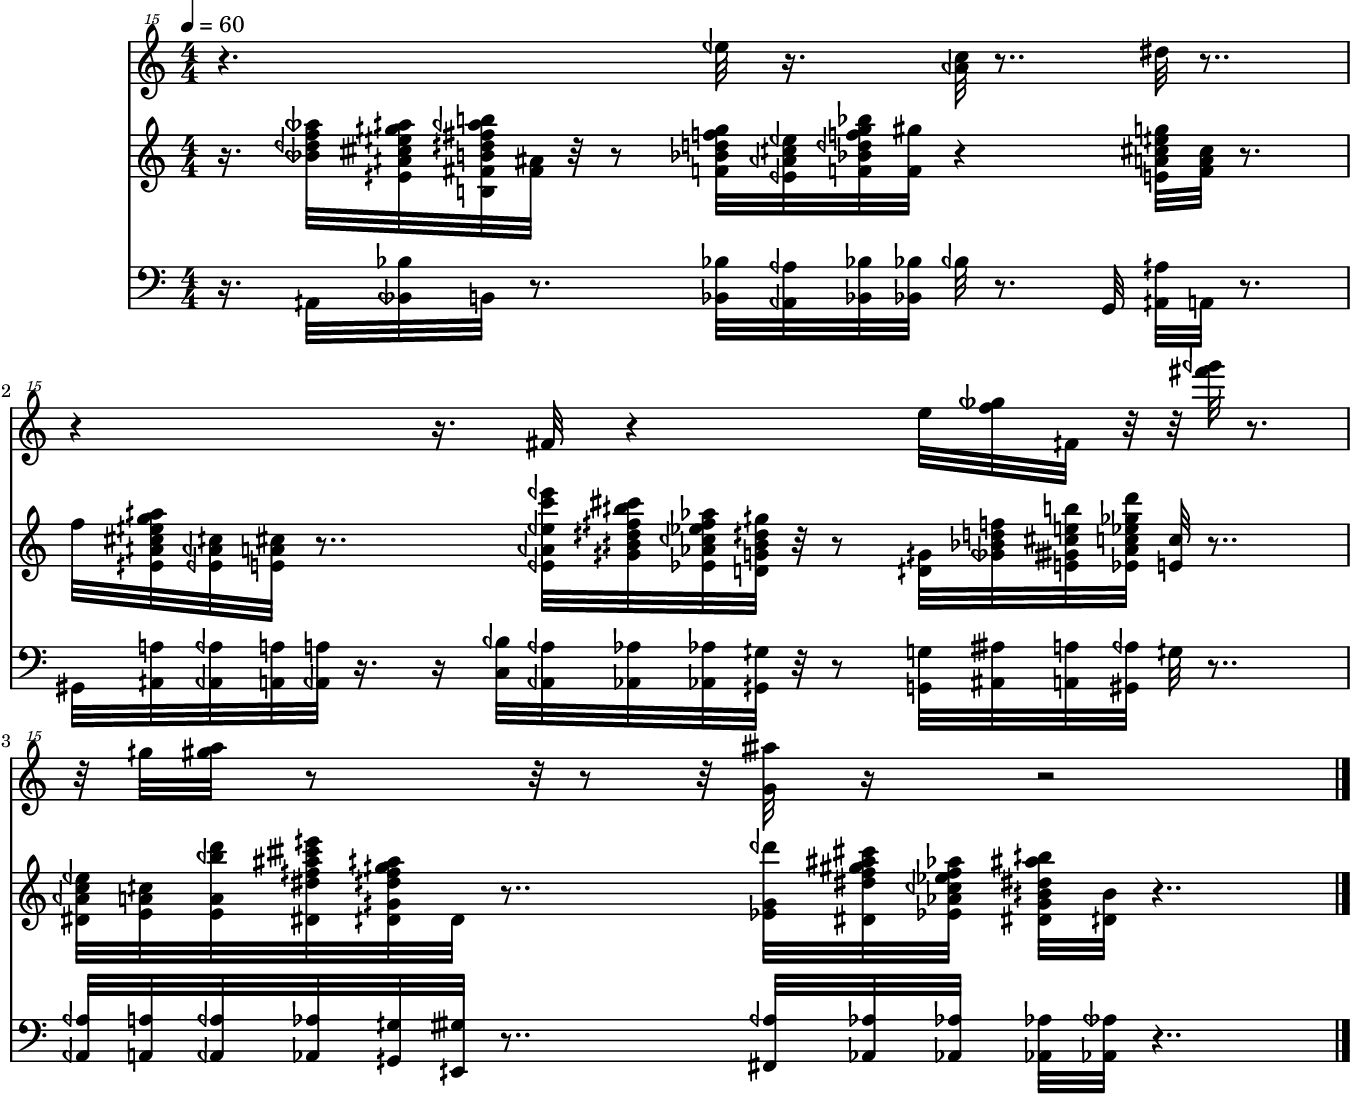

In [15]:
dt = 1/8
times = np.arange(0, cl.durSecs(), dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=8, ampfactor=10, maxfreq=m2f(126), minfreq=40) or Rest(dt) for t in times]
chain3 = Chain(chords)
chain3 = chain3.quantizePitch(step=0.5)
chain3.show()

In [46]:
chain3.write('~/tmp/chain.mid')

OfflineRenderer(sr=44100)
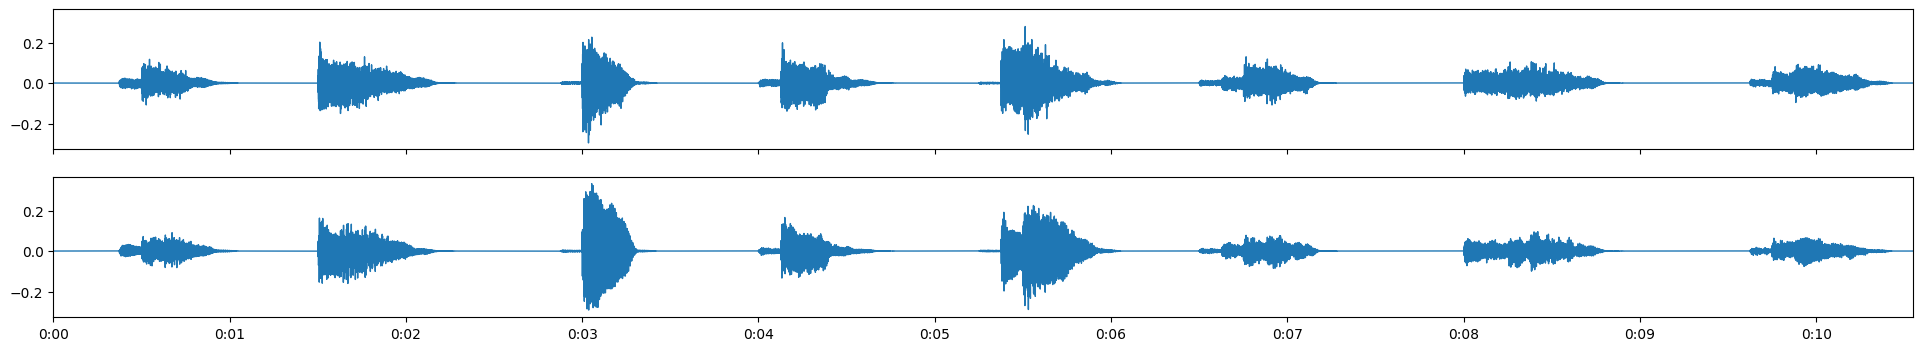

In [45]:
chain3.rec(gain=0.5, instr='.piano', fade=(0., 0.1), sustain=0.2)